In [ ]:
!nvidia-smi

Mon May 26 23:44:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   45C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 145.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/

In [ ]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image
import os

ModuleNotFoundError: No module named 'roboflow'

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

In [ ]:
project = rf.workspace("roboflow-jvuqo").project("football-field-detection-f07vi")
version = project.version(12)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-field-detection-12 in yolov8:: 100%|██████████| 564/564 [00:00<00:00, 3101.41it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

In [ ]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=500 imgsz=640 mosaic=0.0 plots=True

/content
100% 133M/133M [00:03<00:00, 41.6MB/s]
Ultralytics 8.3.145 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/football-field-detection-12/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-pose.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

In [ ]:
!ls {HOME}/runs/pose/train/

args.yaml			 confusion_matrix.png	 PoseR_curve.png   train_batch6860.jpg
BoxF1_curve.png			 labels_correlogram.jpg  results.csv	   train_batch6861.jpg
BoxP_curve.png			 labels.jpg		 results.png	   train_batch6862.jpg
BoxPR_curve.png			 PoseF1_curve.png	 train_batch0.jpg  val_batch0_labels.jpg
BoxR_curve.png			 PoseP_curve.png	 train_batch1.jpg  val_batch0_pred.jpg
confusion_matrix_normalized.png  PosePR_curve.png	 train_batch2.jpg  weights


In [ ]:
from IPython.display import Image

In [ ]:
import os
HOME = os.getcwd()
Image(filename=f'{HOME}/runs/pose/train/confusion_matrix.png', width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/pose/train/confusion_matrix.png'

/content


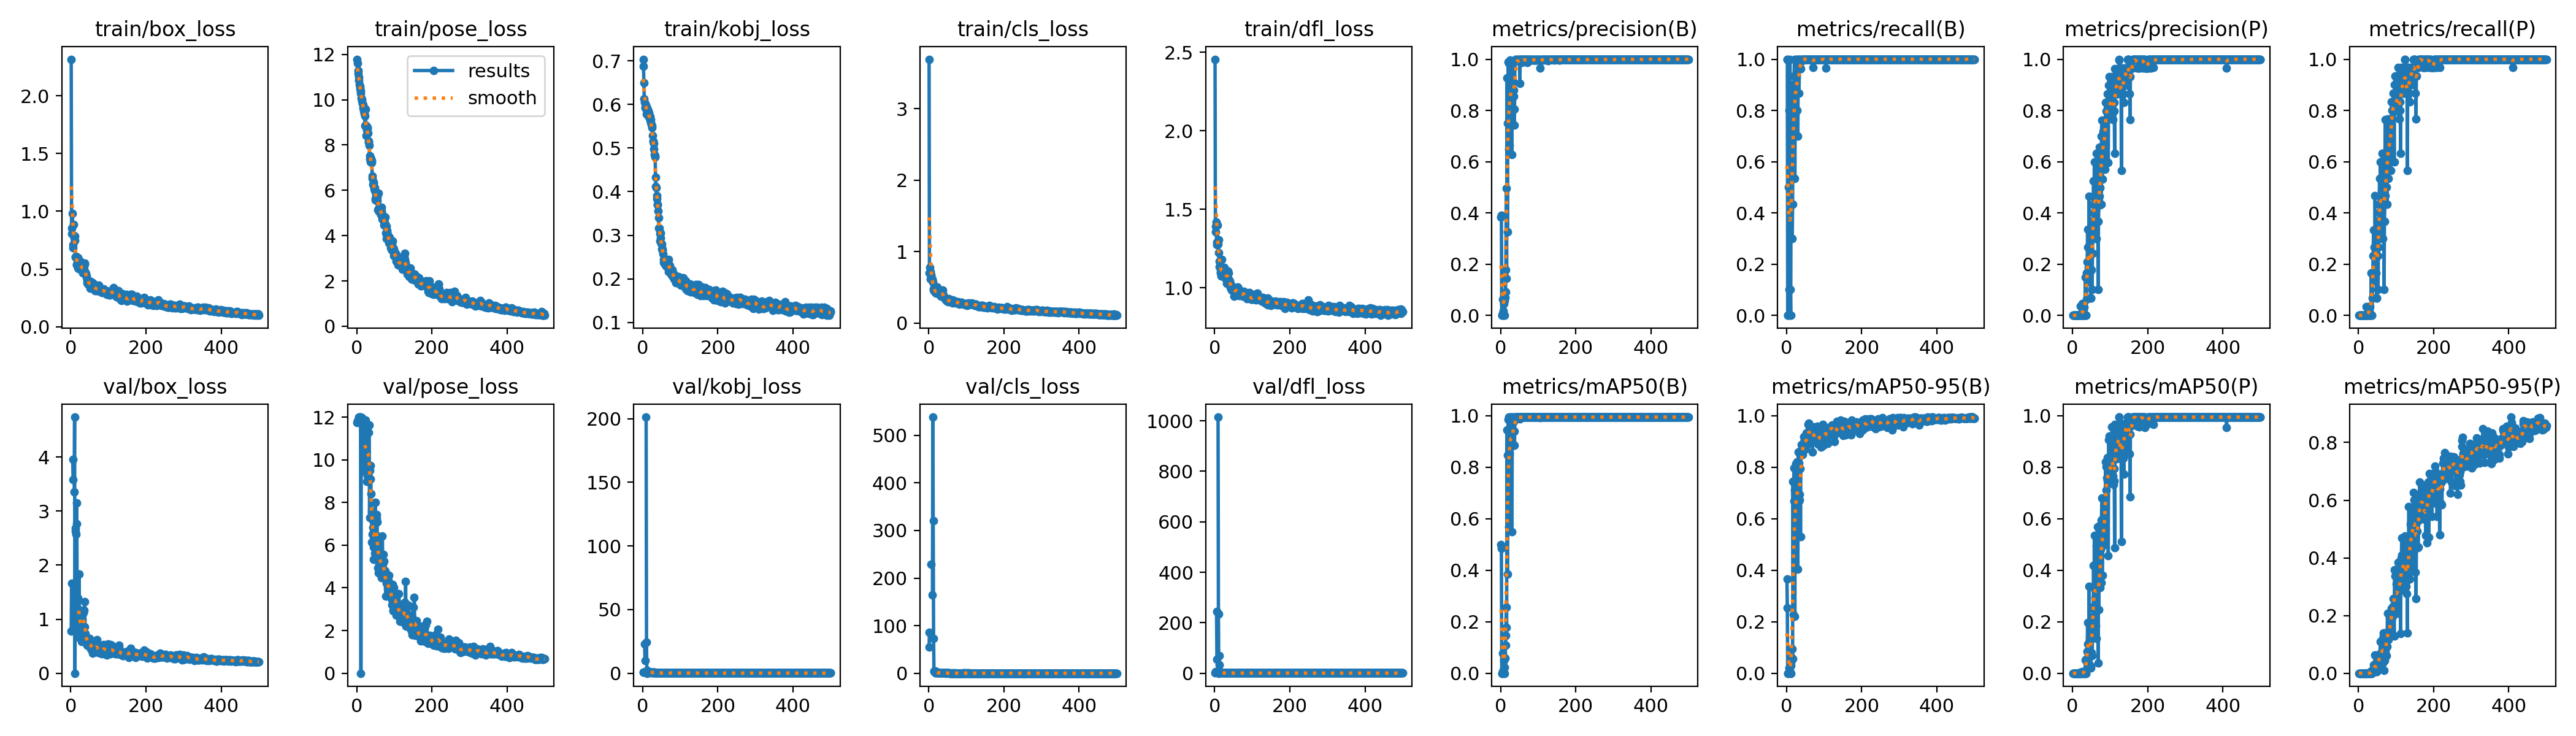

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/results.png', width=600)

/content


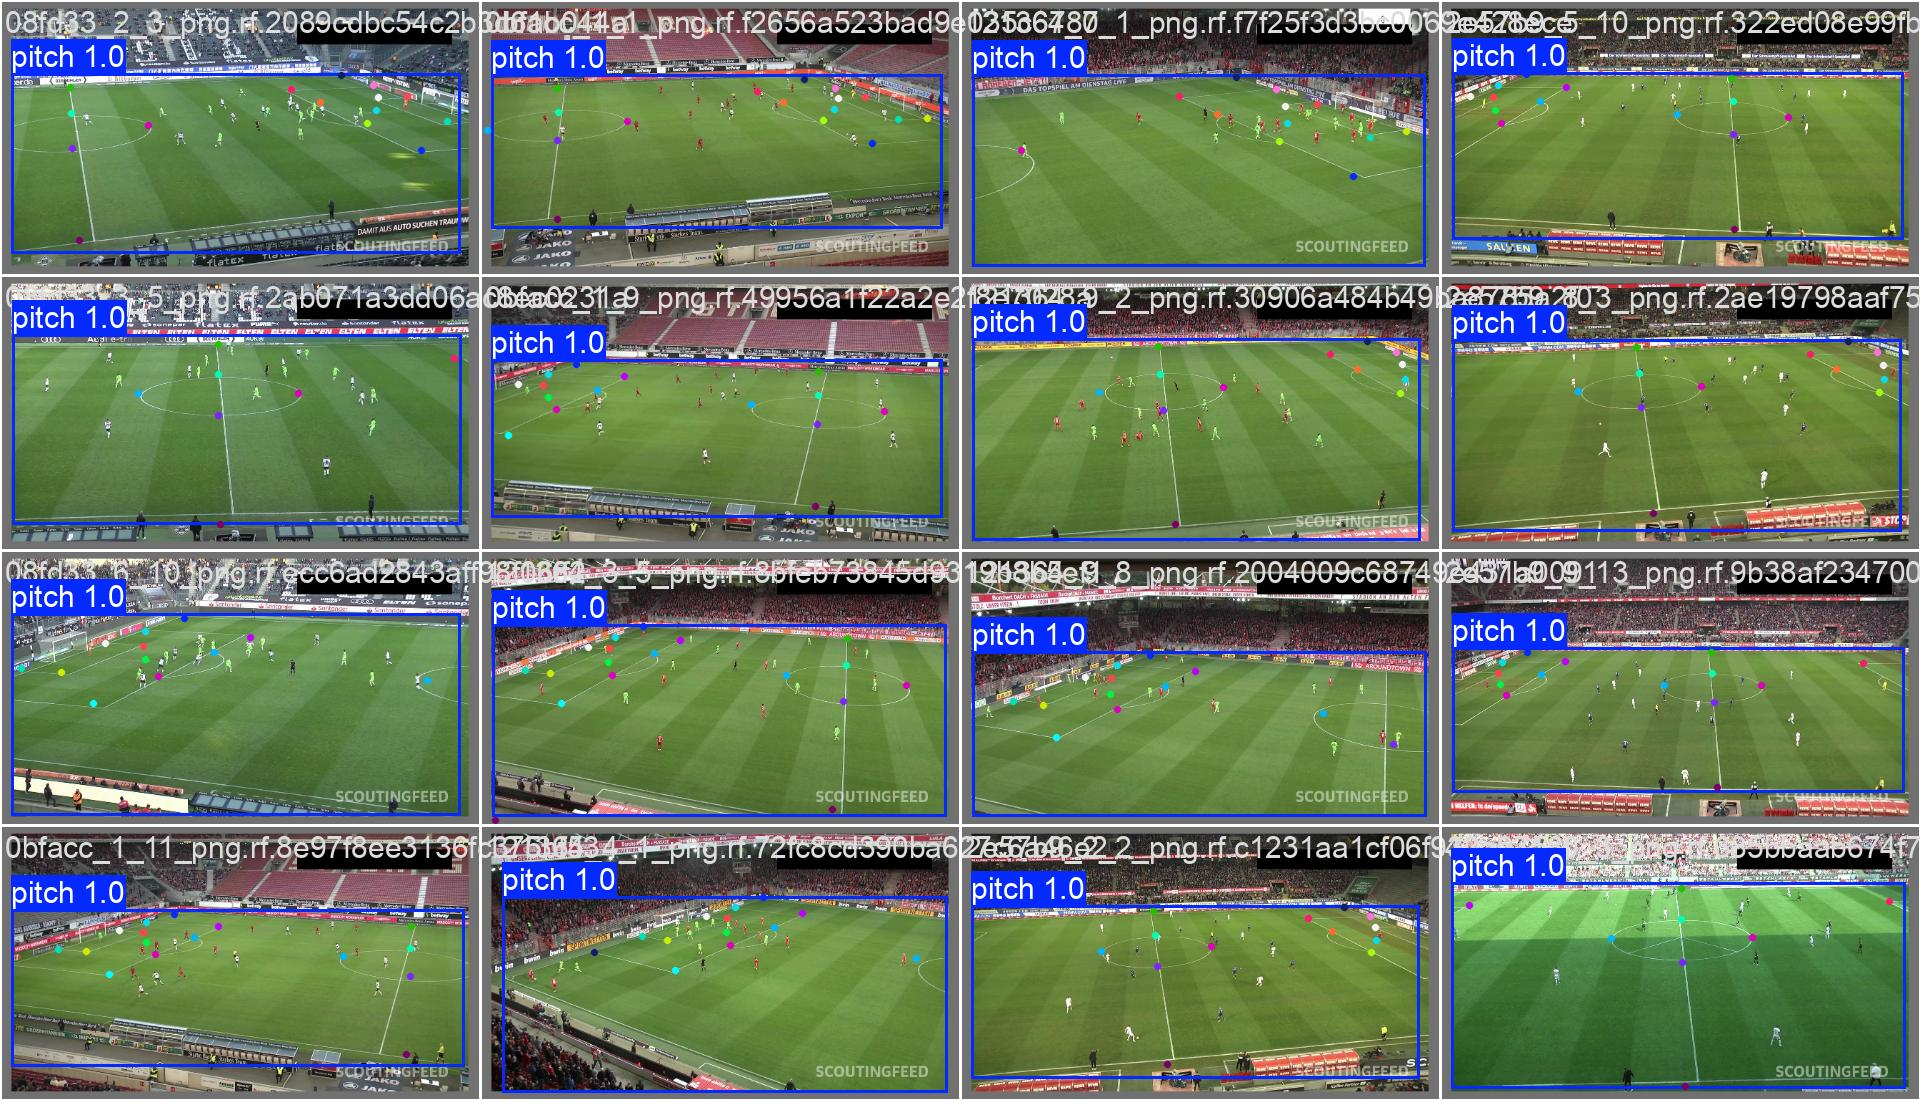

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=pose mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.145 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv8x-pose summary (fused): 121 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3599.9±882.4 MB/s, size: 228.1 KB)
val: Scanning /content/datasets/football-field-detection-12/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.79it/s]
                   all         30         30          1          1      0.995      0.992          1          1      0.995      0.886
Speed: 1.3ms preprocess, 15.1ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/pose/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/runs/pose/train/weights/best.pt \
    /content/drive/MyDrive/

Mounted at /content/drive


In [ ]:
!cp /content/runs/pose/train/results.csv \
    /content/drive/MyDrive/